## Homework #1

Your name: Yeongjun park

### Question 1
You will be performing one iteration of the forward pass and backpropagation calculations for a small network using Python. Here we will focus on the calculations for one training example, though in reality your data sets will be much larger and require matrix computation. You will also calculate the associated loss.

Let $X_1 = 2$ and $X_2 = -1$ be the feature inputs and initialize the weights to be as shown in the figure below. This is a neural network with a single hidden layer consisting of three nodes. The blue numbers within each node represent the values for the bias terms and the black numbers along the edges represent the weights. The hidden layer outputs a single node, from which your task is binary classification. The label for this particular training example outcome is $y = 1$. 

<img src="simple_nn.png" width="500">

Implement a single forward pass of the network. You do not need to implement the network in keras and should instead use numpy operations (either scalar or matrix). Please use the variable names and print statements provided in the code chunks to display results for the TAs. 

* Conceptual explanation:

The forward pass typically refers to the calculation process - values of the output layers given the input data. It is easier to think of it as a traversal process that neurons go through from the first to the last layer. The bakward pass refers to the process of counting changes in weights using a gradient descent algorithm. Computation starts from the last layer and backward to the first layer. 

Loss function is one of the performance metrics that examines how well the neural network manages to reach its goal of generating outputs close to the desired values. A loss function returns a single number, and our goal is to minimize the loss. 

In [ ]:
# Forward pass using numpy operations

import numpy as np

Xs = np.array([[2,-1,1]])
hidden_w = np.matrix([[1,0.2,-0.6],[1.1,0,-0.3],[-1.8,-0.4,0.96]])
Ws = np.matrix([[.5],[.1],[1.3]])
Bs = 2
hidden = np.matmul(Xs, hidden_w)
output = hidden*Ws + Bs
y_hat = 1/(1+np.exp(-out))
prediction = np.round(y_hat)
print('The values for the hidden layer are:', hidden)
print('The value for the output layer is:', output)
print('The predicted probability is:', y_hat)
print('The prediction is:', prediction)

Calculate the loss for the training example making sure to select the appropriate loss function.

In [3]:
# Loss

y_i = 1
loss_i = (-y_i)*np.log(y_hat)-(1-y_i)*np.log(1-y_hat)
print('The loss is:',loss_i)

The loss is: [[0.1792517]]


Implement a single backward pass of the network. Again use numpy and report the values using the print statements provided. Please interpret these values. In other words, what are the values you just calculated used for? 

In [3]:
#  Backward pass of the network using numpy operations

dl_dy = (y_hat-y_i)/(y_hat-y_hat**2)
dy_dout = y_hat*(1-y_hat)
dout_dw_h = hidden
dout_db_h = 1
x_hid = np.array([[1,2,-1]])
dout_dh = np.transpose(w_out)

dl_dw_h = dl_dy*dy_dout*dout_dw_h
dl_db_h = dl_dy*dy_dout*dout_db_h
dl_dw_1 = dl_dy*dy_dout*dout_dh[0,0]*x_hid
dl_dw_2 = dl_dy*dy_dout*dout_dh[0,1]*x_hid
dl_dw_3 = dl_dy*dy_dout*dout_dh[0,2]*x_hid
print('The gradients of the loss wrt to the hidden weights are:', dl_dw_h)
print('The gradient of the loss wrt to the hidden bias is:', dl_db_h)
print('The gradients of the loss wrt to the input weights going to hidden node 1 are:', dl_dw_1)
print('The gradients of the loss wrt to the input weights going to hidden node 2 are:', dl_dw_2)
print('The gradients of the loss wrt to the input weights going to hidden node 3 are:', dl_dw_3)

The gradients of the loss wrt to the hidden weights are: [[ 0.14769407  0.         -0.00984627]]
The gradient of the loss wrt to the hidden bias is: [[-0.16410453]]
The gradients of the loss wrt to the input weights going to hidden node 1 are: [[-0.08205226 -0.16410453  0.08205226]]
The gradients of the loss wrt to the input weights going to hidden node 2 are: [[-0.01641045 -0.03282091  0.01641045]]
The gradients of the loss wrt to the input weights going to hidden node 3 are: [[-0.21333588 -0.42667177  0.21333588]]


### Question 2
In class we were considering classification problems where the goal was to predict a single discrete label of an input data point. Another common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.

You will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset you will be using has another interesting difference from our previous examples: it has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100.

The data consists 13 features. The 13 features in the input data are as follows:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town.
13. % lower SES status of the population.

The targets (outcomes, y) are the median values of owner-occupied homes, in thousands of dollars. The prices are typically between 10,000 and 50,000 dollars. If that sounds cheap, remember this was the mid-1970s, and these prices are not inflation-adjusted.

In [34]:
# Import necessary modules
# Tensorflow must be installed via Linux before installing Keras
import keras
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the data
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

Print the dimensions of the training set, i.e. its shape

In [71]:
# Training shape
print('The dimensions of the training set are:', train_data.shape)

The dimensions of the training set are: (404, 13)


Print the dimensions of the test set, i.e. its shape

In [72]:
# test shape
print('The dimensions of the test set are:', test_data.shape)

The dimensions of the test set are: (102, 13)


It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation.

Normalize the data. Be sure to normalize the test set with the training set mean and standard deviation.

* Conceptual explanation:

In many machine learning algorithms, objective functions may not work propery without normalization because the range of values of raw data varies widely. Data is normalized feather-wise for the given dataset since the aim is to investigate the relationship across data and having the ability to predict well with the new data. 

In [8]:
# Normalize the data
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

Fit a fully connected neural network with 2 hidden layers and an output layer. Include 64 hidden units in each hidden layer and an appropriate number of units in the output layer. You are free to choose the activation functions. Use the `rmsprop` optimization function, and choose an appropriate loss function and model performance measure. Referring to the table shown in lectures 2 and 3 may help with these choices. Run the network for 50 epochs and use a batch_size of 10.

In [43]:
# Build the neural network with 2 hidden layers - 64 hidden units in each layer

network64 = models.Sequential()
network64.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
network64.add(layers.Dense(64, activation = 'relu'))
network64.add(layers.Dense(1))
network64.compile(loss='mean_squared_error',
                optimizer='rmsprop',
                metrics=['mae'])

history = network64.fit(train_data, train_targets, batch_size = 10, epochs=50)

Epoch 1/50
404/404 [==============================] - 1s 1ms/step - loss: 448.2255 - mean_absolute_error: 18.9406
Epoch 2/50
404/404 [==============================] - 0s 104us/step - loss: 179.4268 - mean_absolute_error: 10.8643
Epoch 3/50
404/404 [==============================] - 0s 92us/step - loss: 58.3466 - mean_absolute_error: 5.6460
Epoch 4/50
404/404 [==============================] - 0s 87us/step - loss: 33.4349 - mean_absolute_error: 4.0641
Epoch 5/50
404/404 [==============================] - 0s 85us/step - loss: 23.5308 - mean_absolute_error: 3.3540
Epoch 6/50
404/404 [==============================] - 0s 84us/step - loss: 19.1907 - mean_absolute_error: 2.9280
Epoch 7/50
404/404 [==============================] - 0s 80us/step - loss: 16.8196 - mean_absolute_error: 2.8341
Epoch 8/50
404/404 [==============================] - 0s 79us/step - loss: 15.2639 - mean_absolute_error: 2.6749
Epoch 9/50
404/404 [==============================] - 0s 79us/step - loss: 13.6945 - mean_ab

Report the test set accuracy and compare it to the training set accuracy. **Interpret what this means in words, in terms of what you are trying to do with your network**.

In [44]:
# Test Loss versus Training Loss
test_loss, test_acc = network64.evaluate(test_data, test_targets)
print('test accuracy:', test_acc)
train_loss, train_acc = network64.evaluate(train_data, train_targets)
print('train accuracy:', train_acc)

102/102 [==============================] - 0s 2ms/step
test accuracy: 2.701396072612089
404/404 [==============================] - 0s 19us/step
train accuracy: 1.7768920553792822


* Conceptual explanation:

`rmsprop` lies in the realm of adaptive learning rate methods. It derives the learning rate by an exponential decaying average of squared gradients. `Mean absolute error (MAE)` is used as the performance metric. MAE measures the average magnitude of the errors from a set of predictions. It is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. Given this, a smaller MAE indicates a better performance. `mean squared error (MSE)` is used to compute the loss where a smaller MSE is preferred. Initially, a `sigmoid` activation function is considered and implemented; however, a `relu` activation performs much better than a `sigmoid` activation in terms of MSE (smaller loss) and MAE (smaller error). Therefore, my network is implemented using a `relu` activation function. 

* Accuracy comparison: 

The training accuracy is approximately 1.78 where the test accuracy is approximately 2.70. It makes sense why the training phase performs better because a training phase of machine learning implementation works with data from the gold standard by pairing the input with expected output. Testing phase estimates how well the model does from a different set of data than the data used from the training phase. However, the two accuracy metrics do not differ much, and our model performs well in both training and testing datasets. 


Now fit the same network as above but with 16 hidden nodes in each hidden layer. **What is the test set accuracy and how does it compare to the first network you created? Which model do you think is better?**

In [42]:
# Model with 16 hidden nodes in each hidden layer

network16 = models.Sequential()
network16.add(layers.Dense(16, activation = 'relu', input_shape = (train_data.shape[1],)))
network16.add(layers.Dense(16, activation = 'relu'))
network16.add(layers.Dense(1))
network16.compile(loss='mean_squared_error',
                optimizer='rmsprop',
                metrics=['mae'])

history1 = network16.fit(train_data, train_targets, batch_size = 10, epochs=50)

test_loss1, test_acc1 = network16.evaluate(test_data, test_targets)
train_loss1, train_acc1 = network16.evaluate(train_data, train_targets)
print('test accuracy:', test_acc1)
print('train accuracy:', train_acc1)

Epoch 1/50
404/404 [==============================] - 0s 1ms/step - loss: 581.5797 - mean_absolute_error: 22.3596
Epoch 2/50
404/404 [==============================] - 0s 114us/step - loss: 533.5237 - mean_absolute_error: 21.4300
Epoch 3/50
404/404 [==============================] - 0s 94us/step - loss: 478.3840 - mean_absolute_error: 20.2942
Epoch 4/50
404/404 [==============================] - 0s 89us/step - loss: 409.4852 - mean_absolute_error: 18.7947
Epoch 5/50
404/404 [==============================] - 0s 99us/step - loss: 329.2289 - mean_absolute_error: 16.7740
Epoch 6/50
404/404 [==============================] - 0s 94us/step - loss: 242.9070 - mean_absolute_error: 14.1310
Epoch 7/50
404/404 [==============================] - 0s 92us/step - loss: 167.7737 - mean_absolute_error: 11.0639
Epoch 8/50
404/404 [==============================] - 0s 83us/step - loss: 114.7355 - mean_absolute_error: 8.6380
Epoch 9/50
404/404 [==============================] - 0s 77us/step - loss: 80.610

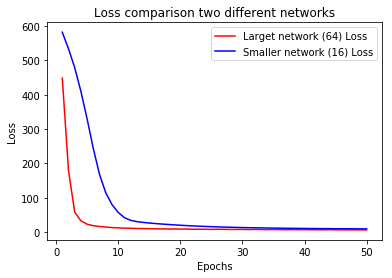

In [70]:
train_loss = history.history['loss']
train_loss1 = history1.history['loss']

epochs = list(range(1, len(train_loss) + 1))
plt.plot(epochs, train_loss, 'b', label = 'Larget network (64) Loss', color = 'red')
plt.plot(epochs, train_loss1, 'b', label = "Smaller network (16) Loss")
plt.title('Loss comparison two different networks')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()

* Model comparison: 

When there are 16 nodes in each hidden layer, both the training and testing datasets perform worse compared to the previous example where 64 nodes are implemented for each hidden layer. The training accuracy is approximately 2.24 where the testing accuracy is approximately 3.11. Same as the previous example, the training dataset performs better than the testing dataset. Therefore, a previous implementation with the 64 hidden units in each layer better predicts Boston median housing prices duing the 1970's. 

There are diffferent expectations and standards when it comes to implementing an ideal number of neurons in each hidden layer. There are some empirically-derived rules-of-thumb, of these, the most commonly relied on is 'the optimal size of the hidden layer is usually between the size of the input and size of the output layer' according to the author of `Introduction to Neural Networks in Java`, Jeff Heaton. Given the size of the input and the output layer, it is thus unsurprising that the network using larger size of the hidden layers performs  better. We can also see from the plot above that the larger network (64 hidden units in each layer) has smaller loss through different epochs. 
